<h1 style="font-size: 40px;">Studying Galaxy Evolution with SDSS and 3D-HST surveys</h1>

<br>
The Sloan Digital Sky Survey (SDSS) is one of the most detailed astronomical surveys, mapping a large portion of the sky in optical and infrared light. It provides:

- Multi-band imaging and spectroscopy for millions of celestial objects.
- Coverage of 14,555 square degrees, nearly 35% of the sky.
- Photometry in five filters (u, g, r, i, z) with precise calibrations.
- Spectra of galaxies, quasars, and stars, enabling redshift measurements.
- Publicly accessible data, supporting astrophysical research and machine learning.

We have processed ugriz filters data data with the CIGALE software (Code Investigation GALaxy Emission) which generates model SEDs with stellar populations synthesis. 

To explore more distant galaxies (z>1), you will also find a catalogue obtained in a smaller area (~ 1
square deg) with the Hubble Space Telescope: the 3D-HST survey catalogue (up to z~3).



In [1]:
# constants cgs

G = 6.67259 * 10**-8 #G in cgs

h = 6.63*10**(-27) #erg s 
c = 2.9979*10**(10) #cm s^-1
m_p = 1.67262192 * 10**(-24) #g
kb = 1.38 * 10**(-16) #erg/K
E_ion_hydrogen = 13.6 * 1.60218e-12
#E_Ly_alpha = 10.2 * 1.60218e-12
#E_Ly_beta = 12.1 * 1.60218e-12

M_sun = 1.9891 * 10**33 #solar mass in g
R_sun = 6.9598 * 10**10 #solar radius in cm 
T_sun_eff = 5772 #Sun surface temperature in K
M_earth = 5.976 * 10**27 #earth mass in g
R_earth = 6.378 * 10**8 #earth radius in cm
ly = 9.463 * 10**17 #light year in cm
parsec = 3.086 * 10**18 #parsec in cm
Mpc = 3.086 * 10**24 #cm
AU = 1.496 * 10**13 #astronomical unit in cm

H0 = 2.176*10**(-18) #Hubble constant, s^-1

Gyr = 3.1536*10**16

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy.table import Table

# Reading data from the SDSS photometric catalogue
sdss_photo = Table.read('FITS/SDSS_LAB2024_photometry.fits')
sdss_spec = Table.read('FITS/SDSS_LAB2024_spectroscopy.fits')
cigale_fit_results = Table.read('FITS/SDSS_LAB2024_CIGALEresults.fits')

id = sdss_photo['id']
redshift = sdss_photo['redshift']
ra, dec = sdss_photo['ra'], sdss_photo['dec']

# Reading and calculating density
with open("FITS/environment_density.txt", "r") as read_file:
    N = np.array([float(env) for env in read_file.read().split()])
density = N / (np.pi * 0.5**2)

# Extracting data from CIGALE results
SFR_bayes = cigale_fit_results['bayes_sfh_sfr']
stellar_mass_bayes = cigale_fit_results['bayes_stellar_m_star']
SFR_best = cigale_fit_results['best_sfh_sfr']
stellar_mass_best = cigale_fit_results['best_stellar_m_star']
age = cigale_fit_results['best_sfh_age']

# Calculate specific star formation rates (sSFR)
sSFR_bayes = np.divide(SFR_bayes, stellar_mass_bayes, where=stellar_mass_bayes > 0)
sSFR_best = np.divide(SFR_best, stellar_mass_best, where=stellar_mass_best > 0)

# Spectral line fluxes and errors
lines_flux = {
    'H_alpha': sdss_spec["h_alpha_flux"],
    'H_beta': sdss_spec["h_beta_flux"],
    'OII_3726': sdss_spec['oii_3726_flux'],
    'OII_3729': sdss_spec['oii_3729_flux'],
    'OIII_5007': sdss_spec["oiii_5007_flux"],
    'NII_6584': sdss_spec["nii_6584_flux"],
    'SII_6717': sdss_spec["sii_6717_flux"],
    'SII_6731': sdss_spec["sii_6731_flux"]
}

lines_errors = {
    'H_alpha_err': sdss_spec['h_alpha_flux_err'],
    'H_beta_err': sdss_spec['h_beta_flux_err'],
    'OII_3726_err': sdss_spec['oii_3726_flux_err'],
    'OII_3729_err': sdss_spec['oii_3729_flux_err'],
    'OIII_5007_err': sdss_spec['oiii_5007_flux_err'],
    'NII_6584_err': sdss_spec['nii_6584_flux_err'],
    'SII_6717_err': sdss_spec['sii_6717_flux_err'],
    'SII_6731_err': sdss_spec['sii_6731_flux_err']
}

metallicity = sdss_spec["log_oh"]


In [4]:
import pandas as pd

# Convert Astropy Tables to pandas DataFrames
df_sdss_photo = sdss_photo.to_pandas()
df_sdss_spec = sdss_spec.to_pandas()
df_cigale_results = cigale_fit_results.to_pandas()

print("SDSS Photometry Data:")
print(df_sdss_photo.head(5).to_string(index=False), "\n")

print("SDSS Spectroscopy Data:")
print(df_sdss_spec[['id','h_alpha_flux', 'h_beta_flux', 'oii_3726_flux', 'oii_3729_flux',"oiii_5007_flux","nii_6584_flux","sii_6717_flux","sii_6731_flux"]].head(5).to_string(index=False), "\n")

print("CIGALE Fit Results:")
print(df_cigale_results[['id','bayes_sfh_sfr','bayes_stellar_m_star','best_sfh_sfr','best_stellar_m_star','best_sfh_age']].head(5).to_string(index=False), "\n")


SDSS Photometry Data:
                 id         ra       dec  redshift  sdss.up  sdss.up_err  sdss.gp  sdss.gp_err  sdss.rp  sdss.rp_err  sdss.ip  sdss.ip_err  sdss.zp  sdss.zp_err
1237657873254907919 140.153626 39.308208  0.028312 0.119670     0.020435 1.029917     0.012816 1.621148     0.022931 1.954847     0.023217 2.286192     0.059580
1237657873254973544 140.325684 39.456471  0.056195 0.091612     0.006626 0.247744     0.003121 0.358206     0.004741 0.453588     0.007278 0.492240     0.025029
1237654880726286453 190.287293  5.309674  0.074970 0.045000     0.004752 0.214703     0.004054 0.462379     0.007594 0.667785     0.011125 0.835854     0.022765
1237654880727728243 193.587524  5.282654  0.048760 0.466016     0.013479 1.720028     0.006990 2.967451     0.009481 4.098367     0.018062 4.911618     0.059197
1237654880728842356 196.179871  5.124015  0.054671 0.147323     0.008597 0.379945     0.003792 0.529207     0.006502 0.663836     0.009359 0.737546     0.032889 

SDSS Spect

### Best vs Bayes

**Best Result (Maximum Likelihood Best Fit):**

Is typically the set of parameters that maximizes the likelihood function. In simpler terms, it finds the parameters that best explain the observed data assuming a particular model. Achieved by minimizing a cost function, such as chi-squared $\chi^2$, or maximizing the likelihood function. Often done using optimization techniques such as least-squares fitting.

- Provides a single best-fit solution.
- Can be sensitive to noise or outliers in the data.
- Doesn't naturally account for parameter uncertainties or prior knowledge.

**Bayes:**

Based on the posterior distribution obtained through Bayes' theorem:

$$P(\theta | D) = \frac{P(D | \theta) P(\theta)}{P(D)}$$

Where:
- $P(\theta | D)$: Posterior distribution of the parameters \(\theta\) given the data \(D\).
- $P(D | \theta)$: Likelihood of the observed data given the parameters.
- $P(\theta)$: Prior distribution representing prior knowledge of the parameters.
- $P(D)$: Evidence (normalization constant), ensuring the posterior integrates to 1.

$$P(D) = \int P(D | \theta) P(\theta) \, d\theta$$

1. Bayesian Mean (Expected Value)
   
   $$\theta_{\text{Bayesian Mean}} = \int \theta P(\theta | D) \, d\theta$$
   

2. Bayesian Variance
   
   $$\sigma^2_\theta = \int (\theta - \mu_\theta)^2 P(\theta | D) \, d\theta$$
   

3. Maximum A Posteriori (MAP): the value $\theta_\text{MAP}$ that maximizes the posterior distribution:
     
     $$\theta_{\text{MAP}} = \arg \max_\theta P(\theta | D)$$
     
In practice, these integrals are often difficult to compute analytically due to the complexity of the likelihood or prior functions. Numerical methods such as **Markov Chain Monte Carlo (MCMC)** are commonly used to approximate these integrals by sampling from the posterior distribution.

**CANDELS+3D-HST**

CANDELS+3D-HST survey4 provides photometry and
spectroscopy for nearly 20,000 galaxies in five areas of the sky characterized by deep observations
with several ground- and space-based telescopes. The catalog contains: galaxy identifiers (IDs, Ra,
Dec), the magnitude in the HST/WFC3 F140W filter mF 140W (the sample is cut at mF140W < 24mag),
the redshift of each source and its uncertainty, the stellar mass, AV , and SFR estimates from SPS fits
(see Skelton et al. 2014, Section 5.4, http://arXiv.org/abs/1403.3689), and lastly the U −V
and V − J rest frame colors. These two quantities can be used to identify passive and star forming
galaxies independently of the SFR value itself, see Whitaker et al. 2011 (http://arXiv.org/abs/
1105.4609).

In [68]:
# and from the 3DHST catalogue
CANDELS_3DHST = Table.read('FITS/3DHST_Allfields.fits')

redshift_3DHST = CANDELS_3DHST['z_best']
stellar_mass_3DHST = CANDELS_3DHST['lmass']
SFR_3DHST = CANDELS_3DHST['lsfr']
UmV = CANDELS_3DHST['UmV']
VmJ = CANDELS_3DHST['VmJ']

sSFR_3DHST = np.log10(10**(SFR_3DHST) / 10**(stellar_mass_3DHST))
#sSFR_3DHST = np.divide(10**(SFR_3DHST), 10**(stellar_mass_3DHST), where=stellar_mass_3DHST > 0)

In [6]:
df_3DHST = CANDELS_3DHST.to_pandas()
print("CANDELS+3D-STH survey4:")
print(df_3DHST.head(5).to_string(index=False), "\n")

CANDELS+3D-STH survey4:
 id  fieldnr  field         ra      dec   m_F140W  z_best  z_best_l68  z_best_u68  ltau  lage  Av  lmass  lsfr      UmV      VmJ
371        1 b'COS' 150.105438 2.185220 21.101504  1.1415      1.1338      1.1496   8.4   9.1 0.5  10.65  0.29 1.512698 1.103150
419        1 b'COS' 150.102737 2.183779 23.666397  2.1979      2.1785      2.2700   8.0   8.4 1.0  10.05  1.15 0.854543 0.684450
431        1 b'COS' 150.098907 2.184437 23.156574  0.5643      0.5450      0.5850   8.6   9.0 0.0   8.79 -0.67 0.789004 0.375896
445        1 b'COS' 150.105835 2.184444 22.842907  1.2122      1.2094      1.2276   8.8   9.6 0.6  10.48 -0.80 2.233808 1.483009
457        1 b'COS' 150.103409 2.185715 21.596238  0.5336     -1.0000     -1.0000   7.2   8.0 0.5   9.13 -0.66 0.638022 0.403702 



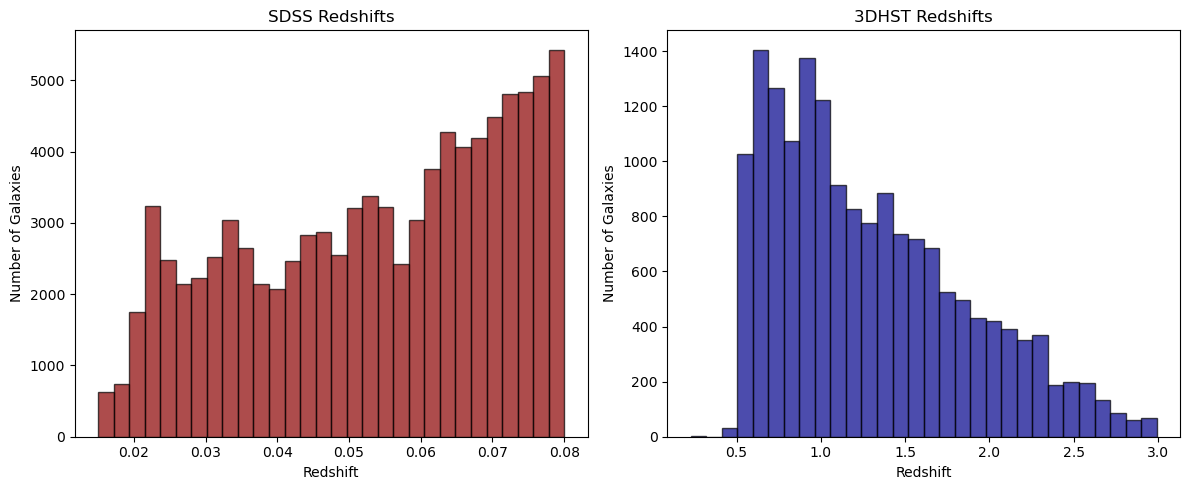

In [7]:
import matplotlib.pyplot as plt

# Set up the figure and axis for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #, sharey=True

# Plot histogram for SDSS redshifts
axes[0].hist(redshift, bins=30, color='darkred', alpha=0.7, edgecolor='black')
axes[0].set_title('SDSS Redshifts')
axes[0].set_xlabel('Redshift')
axes[0].set_ylabel('Number of Galaxies')

# Plot histogram for 3DHST redshifts
axes[1].hist(redshift_3DHST, bins=30, color='darkblue', alpha=0.7, edgecolor='black')
axes[1].set_title('3DHST Redshifts')
axes[1].set_xlabel('Redshift')
axes[1].set_ylabel('Number of Galaxies')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Empirical SFR: the Kennicut-Schmidt law

Stellar mass is built up by the star formation rate ($SFR$) over time from an initial time $t_0$:

$$ m_*(t) = \int_{t_0}^t SFR(t') dt' $$ 

The star formation rate, $SFR(t)$, is modeled as proportional to the gas mass m_{gas}(t) raised to the power of alpha, with a star formation efficiency factor, $\epsilon(t)$:

$$ SFR(t) = \epsilon(t) m_{gas}^\alpha(t) $$ 

The **Kennicut-Schmidt** empirical law states that the star formation rate ($SFR$) is proportional to the gas mass $m_{gas}(t)$ ($\alpha=1$) and inversely proportional to the dynamical time scale ($\tau_{dyn}$):

$$ SFR(t) = \frac{\epsilon'}{\tau_{dyn}} m_{gas}(t) $$ 

where $\epsilon'\sim 0.02$ is a constant that regulates the rate of gas consumption and $t_{dyn}$ is the time scale for the gas in the galaxy to collapse toward the center of the galaxy. 

$$ t_{dyn} = 2 \times 10^7 \, \text{yr} \left(\frac{R_{1/2}}{4 \, \text{kpc}}\right) \left(\frac{V_c}{200 \, \text{km/s}}\right)^{-1} $$ 

Deviding for the total area of the galaxy:

$$ \dot{\Sigma}_* = \frac{\dot{M}_*}{M_\text{GMC}} f_{H_2}\Sigma_\text{gas} $$ 

Left: first Kennicut-Shmidt plot, unresolved (averaged on all galaxy). Center: spatially resolved KS law (ALMA, VLT). Right: KS for only molecular hydrogen. No SFR is possible below a H2 threshold. 

<div style="text-align:center;">
    <img src="images/kennicut_unresolved.png" width="30%" style="display:inline-block" />
    <img src="images/kennicut_resolved.png" width="30%" style="display:inline-block" />
    <img src="images/kennicut_H2.png" width="30%" style="display:inline-block" />
</div>


**Tully-Fisher**

The Tully-Fisher relation connects the galaxy's circular velocity $V_c$ with its stellar mass $M$, indicating that more massive galaxies tend to have higher circular velocities:

$$ \log(M_\odot) = 3.60 \cdot \log\left(\frac{V_c}{v_{\text{ref}}}\right) + 10.50 $$ 


**Size-Mass relation**

The size-mass relation connects the effective radius ($R_{eff}$) of a galaxy to its stellar mass $M_*$, with A being a constant and $\alpha$ approximately equal to 0.22.

$$ \frac{R_{\text{eff}}}{\text{kpc}} = A \left(\frac{M_*}{5 \times 10^{10} M_\odot}\right)^\alpha $$ 

The circular velocity and the effective radius scale more or less the same way with mass. This implies that the dynamical time is approximately constant for a range of galaxies.

<div style="text-align:center;">
    <img src="images/tully_fisher.png" width="30%" style="display:inline-block" />
    <img src="images/mass_size.png" width="50%" style="display:inline-block" />
</div>


**Metallicty**

Relative abundance of elements heavier than He.
There is GAS PHASE metallicity (metals abundance in the ISM, visible in emission) and STELLAR METALLICITY (metals embedded in stars, visible in absorption).

$$Z= \frac{[Z]}{[H]}$$

With this definition $1 = X + Y + Z$, where $X$ is the mass fraction of Hydrogen and $Y$ is the mass fraction of Helium. $Z_\odot = 0.020$. 

Another definition is: $12 + log(O/H)$. In this units $Z_\odot = 8.69$. 7.69 is 10% less metals compraed to the Sun, 9.69 is ten times more metals. 

It is possible to measure metallicities in the gas phase by comparing hydrogen lines to lines of heavy metals. Considering e.g. [OIII] as an example:

$$\frac{I([OIII]5008)}{I(H\beta)} = \frac{n_en_{O^{++}}f(q,A)hv_{5008}}{n_en_{H^+}\alpha_{eff}hv_{H\beta}}$$

where $f(q,A)$ is a complex function that describes the detailed balance of collisions and recombinations, hence depending on temperature). Another line very usefull for metaliccity determination is $N_2$.

<div style="text-align:center;">
    <img src="images/metallicity_calibration.png" width="60%" style="display:inline-block" />
</div>






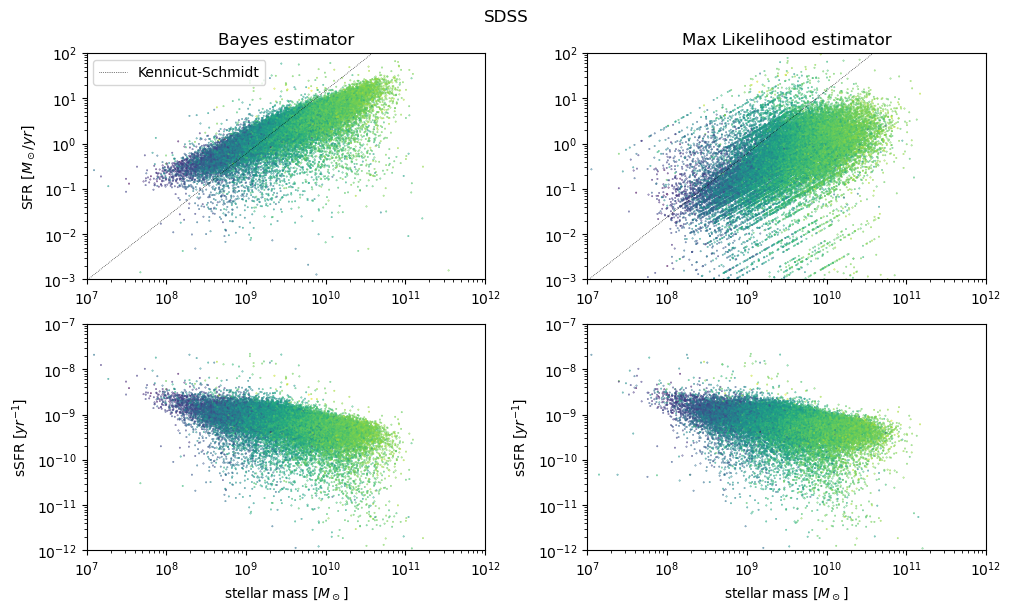

In [45]:
# SFR and sSFR vs Stellar Mass, Metallicity 

fig, ax = plt.subplots(2, 2, figsize=(10,6),layout="constrained") 
fig.suptitle("SDSS")
ax = ax.flatten()

S = ax[0].scatter(stellar_mass_bayes[metallicity>-9999],SFR_bayes[metallicity>-9999], c=metallicity[metallicity>-9999], s=0.1, cmap='viridis')
ax[0].set(xscale = 'log', yscale = 'log', xlim = (1e7,1e12), ylim = (1e-3,1e2)) 
ax[0].set_ylabel("SFR [$M_\odot/yr$]") 
ax[0].set_title("Bayes estimator")

x = np.logspace(7,12)
ax[0].plot(x, 1.5*1e-13 * x**1.4,label="Kennicut-Schmidt", c='black',linestyle=':',linewidth=0.5)
ax[0].legend()

ax[1].scatter(stellar_mass_best[metallicity>-9999],SFR_best[metallicity>-9999], c=metallicity[metallicity>-9999], s=0.1,cmap='viridis')
ax[1].set(xscale = 'log', yscale = 'log', xlim = (1e7,1e12), ylim = (1e-3,1e2)) 
ax[1].set_title("Max Likelihood estimator")

x = np.logspace(7,12)
ax[1].plot(x, 1.5*1e-13 * x**1.4,label="Kennicut-Schmidt", c='black',linestyle=':',linewidth=0.5)

ax[2].scatter(stellar_mass_bayes[metallicity>-9999],sSFR_bayes[metallicity>-9999],c=metallicity[metallicity>-9999], s=0.1,cmap='viridis')
ax[2].set(xscale = 'log', yscale = 'log', xlim = (1e7,1e12), ylim = (1e-12,1e-7)) 
ax[2].set_xlabel("stellar mass [$M_\odot$]") 
ax[2].set_ylabel("sSFR [$yr^{-1}$]")

ax[3].scatter(stellar_mass_best[metallicity>-9999],sSFR_bayes[metallicity>-9999],c=metallicity[metallicity>-9999], s=0.1,cmap='viridis')
ax[3].set(xscale = 'log', yscale = 'log', xlim = (1e7,1e12), ylim = (1e-12,1e-7)) 
ax[3].set_xlabel("stellar mass [$M_\odot$]") 
ax[3].set_ylabel("sSFR [$yr^{-1}$]")

fig.colorbar(S, ax=axes, location='bottom', shrink=0.5, label='metallicity 12 + log(O/H)') 
plt.show()



More massive galaxies have higher metallicity than low mass galaxies. Why? The more obvious explanation is that high mass galaxies have formed stars for a longer time, and subsequent stellar populations have polluted the ISM more and more.

## Galaxy Metallicity Relations and the Fundamental Metallicity Relation

Local galaxies exhibit a tight correlation between stellar mass and gas-phase metallicity, known as the **mass-metallicity relation**. Closed box models (where all the metals produced by stars are retained inside a galaxy) would predict, however, a correlation of metallicity with the inverse of the gas fraction, $f_{\text{gas}}$. 

In cases where the effective yield, defined as:

$$y_{\text{eff}} = \frac{Z_\text{obs}}{\ln(f_{\text{gas}})}$$

is equal to the true nucleosynthetic yield, these models would apply. However, it is found that $y_{\text{eff}} < y_{\text{true}}$, which suggests that the origin of the steep correlation is explained by a selective loss of metals from galaxies with shallow potential wells via **galactic winds**.

A second correlation, known as the **fundamental metallicity relation** exists between mass, star formation rate (SFR), and metallicity. In this 3D space, galaxies lie in a **fundamental plane**, which can then be projected into both the mass-metallicity relation and the SFR-mass relation. 

This implies a correlation between metallicity and SFR. The FMR can be explained by:

- **Infall** of metal-poor gas, which shapes the trend of metallicity with SFR.
- **Outflow** of metal-rich material, which leads to the dependence on stellar mass.

The combination of these two effects with the **Schmidt-Kennicutt law** leads to the FMR.

<div style="text-align:center;">
    <img src="images/FMR.png" width="40%" style="display:inline-block" />
    <img src="images/metal_yield.png" width="40%" style="display:inline-block" />
</div>

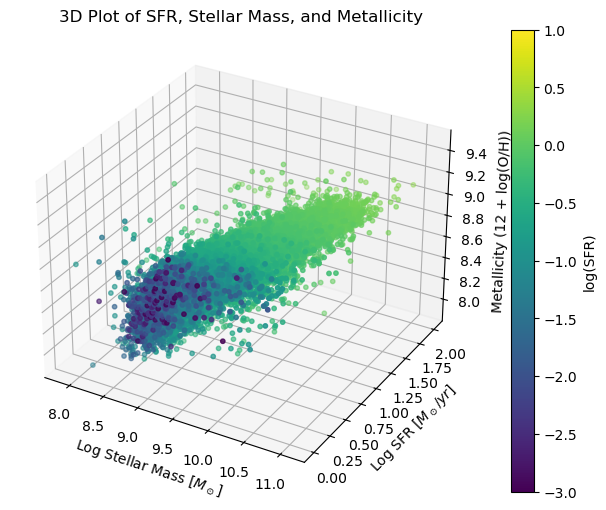

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Remove invalid values (e.g., -9999 values for metallicity)
valid_data = metallicity > -9999
stellar_mass_bayes_valid = np.log10(stellar_mass_bayes[valid_data])
SFR_bayes_valid = np.log10(SFR_bayes[valid_data])
metallicity_valid = metallicity[valid_data]

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on the log of SFR
sc = ax.scatter(stellar_mass_bayes_valid, SFR_bayes_valid, metallicity_valid, 
                c=np.log10(SFR_bayes_valid),cmap='viridis',  vmin=-3,vmax=1,s=10)

# Labels and title
ax.set_xlabel('Log Stellar Mass [$M_\odot$]')
ax.set_ylabel('Log SFR [$M_\odot/yr$]')
ax.set_zlabel('Metallicity (12 + log(O/H))')
ax.set_title('3D Plot of SFR, Stellar Mass, and Metallicity')

# Colorbar
fig.colorbar(sc, ax=ax, label='log(SFR)')

plt.show()

# BPT Diagram

In a plane of $[OIII]λ5008/H\beta$ and $[NII]λ 6585/H\alpha$, where ratios are chosen to be at similar
wavelengths to minimize the effect of dust, HII regions and AGN lies in two separate branches. Given typical temperature (7000 − 9000 K) and density ($10^2 − 10^4 \text{cm}^{−3}$) conditions, HII regions are expected to lie in a characteristic branch. AGN have higher ionization
(hence higher $[OIII]/H\beta$ ) and higher temperatures (hence higher $[NII]/H\alpha$), moving them in a
separate branch. A third locus can be identified as the LINERs regions (Low Ionization Nuclear
Emission Region), thought to be AGN where hard x-rays only partially ionize the nearby gas (hence
oxygen is mostly in O$^+$ rather than O$^{++}$ ). More recently, it has been proposed that this locus of the
BPT diagram is populated also by galaxies hosting TP-AGB stars in their nuclei.

In [9]:
# Classify as AGN based on BPT (Baldwin-Phillips-Terlevich) diagram criterion

log_NII_Halpha = []
log_OIII_Hbeta = []

SNR_threshold = 5  # Signal-to-noise ratio threshold
AGN = []


for i in range(len(id)):

    # Check signal-to-noise ratio for each spectral line
    if (
        lines_flux['H_alpha'][i] / lines_errors['H_alpha_err'][i] > SNR_threshold and
        lines_flux['H_beta'][i] / lines_errors['H_beta_err'][i] > SNR_threshold and
        lines_flux['OIII_5007'][i] / lines_errors['OIII_5007_err'][i] > SNR_threshold and
        lines_flux['NII_6584'][i] / lines_errors['NII_6584_err'][i] > SNR_threshold
    ):
        # Compute log flux ratios
        log_NII_Halpha.append(np.log10(lines_flux['NII_6584'][i] / lines_flux['H_alpha'][i]))
        log_OIII_Hbeta.append(np.log10(lines_flux['OIII_5007'][i] / lines_flux['H_beta'][i]))

        if np.log10(lines_flux['OIII_5007'][i] / lines_flux['H_beta'][i]) > 0.61 / (np.log10(lines_flux['NII_6584'][i] / lines_flux['H_alpha'][i]) - 0.05) + 1.3:
            AGN.append(True)
        else:
            AGN.append(False)
    else:
        AGN.append(None)


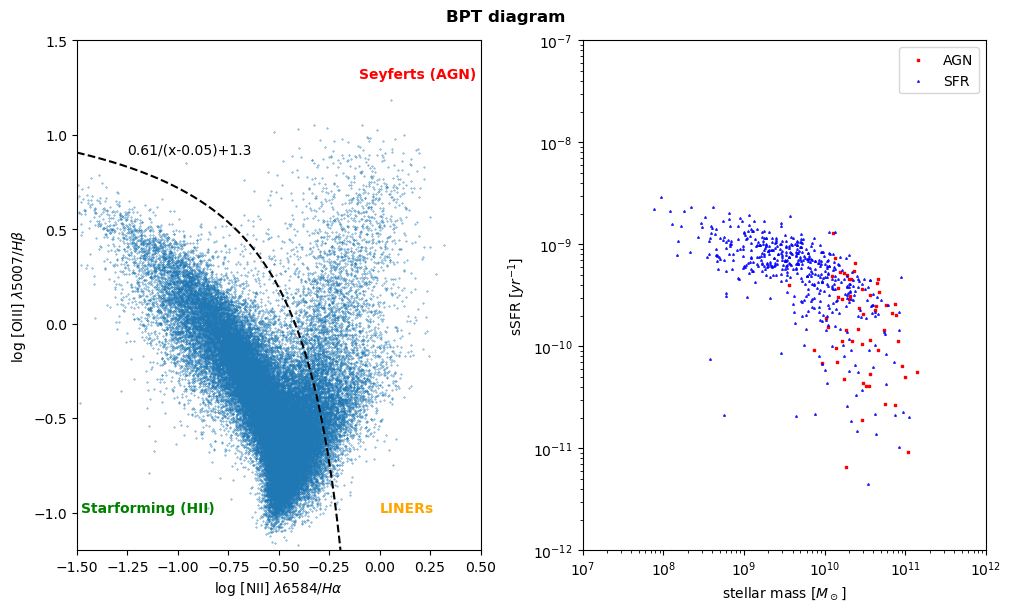

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10,6),layout="constrained") 
fig.suptitle('BPT diagram',weight='bold') 

ax[0].scatter(log_NII_Halpha, log_OIII_Hbeta, s=0.1) 

x=np.linspace(-1.5,0.,1000)
ax[0].plot(x,0.61/(x-0.05)+1.3,linestyle='dashed',c='black')
ax[0].set(xlim = (-1.5,0.5), ylim = (-1.2,1.5))

ax[0].set_xlabel("log [NII] $\lambda 6584/H \\alpha$") 
ax[0].set_ylabel("log [OIII] $\lambda 5007/H \\beta$")

AGN = np.array(AGN)
random_indices = np.random.choice(len(stellar_mass_bayes), 1000, replace=False)


ax[1].scatter(stellar_mass_bayes[random_indices][AGN[random_indices] == True],sSFR_bayes[random_indices][AGN[random_indices] == True], s=1,c='red',label='AGN',marker='s')
ax[1].scatter(stellar_mass_bayes[random_indices][AGN[random_indices] == False],sSFR_bayes[random_indices][AGN[random_indices] == False], s=1,c='blue',label='SFR',marker='^')
ax[1].set(xscale = 'log', yscale = 'log', xlim = (1e7,1e12), ylim = (1e-12,1e-7)) 
ax[1].set_xlabel("stellar mass [$M_\odot$]") 
ax[1].set_ylabel("sSFR [$yr^{-1}$]")
ax[1].legend(loc='upper right')

ax[0].text(-0.1,1.3,'Seyferts (AGN)',c='red',weight='bold')
ax[0].text(-1.48,-1,'Starforming (HII)',c='green',weight='bold')
ax[0].text(0,-1,'LINERs',c='orange',weight='bold')
ax[0].text(-1.25,0.9,'0.61/(x-0.05)+1.3',c='black')

plt.show()

# Abundance matching and the $M_\text{halo} - M_*$ relation

Galaxies grow in co-evolution with their hosting dark matter halo. Different classes of numerical
simulations have been developed, hydrodynamic simulations include both baryonic processes and
dark matter structure formation, and are typically highly computationally expensive and limited
to smaller volumes. A second class is composed of dark matter only simulations, which are less
expensive and can simulate large volumes. Analytic methods have been proposed to associate galaxy
physical properties to these dark matter haloes. We will use the Sub-Halo Abundance Matching
(SHAM) method to link the dark matter mass ($M_h$) of individual haloes with the galaxy stellar mass
($M_∗$). 

We will use dark matter haloes at $z = 0$ from the Millennium Simulation 1 (https://wwwmpa.mpa-garching.mpg.de/galform/virgo/millennium/), a cosmological
dark matter-only simulation run in a box of side $500 \, \mathrm{Mpc}/h_0$. Our catalogue covers a volume of 
$150^3 \, \mathrm{Mpc}^3$ with $h_0 = 0.7$. Each row in the catalogue represents a single dark matter halo, 
for which we provide the following properties:
- The halo type (i.e., if it is a central halo ($\text{TYPE}=0$) or a satellite ($\text{TYPE}>0$)).
- Their position ($X, Y, Z$ in $\mathrm{Mpc}$).
- The dark matter mass ($\mathrm{MVIR}$ in units of $M_\odot$).
- The maximum rotational velocity of the halo ($\mathrm{INFALLV MAX}$ in $\mathrm{km\, s^{-1}}$).

The abundance matching technique is based on the assumption that the most massive galaxies live
in the most massive haloes, in a manner that preserves the rank order of these two quantities. A
necessary ingredient is the distribution of stellar mass in galaxies. This comes from observations
of galaxy samples (Baldry et al, 2012 https://ui.adsabs.harvard.edu/abs/2012MNRAS.421..621B/abstract)

These models can be parametrized in the form (e.g. Moster et al. 2010, https://arxiv.org/abs/0903.4682):

$$\frac{M_*}{M_{\text{vir}}} = 2 \left( \frac{M_*}{M_{\text{vir}}} \right)_0 
\left[ \left( \frac{M_{\text{vir}}}{M_{\text{vir},1}} \right)^{-\beta} + 
\left( \frac{M_{\text{vir}}}{M_{\text{vir},1}} \right)^{\gamma} \right]^{-1}$$

This function shows a maximum around $M_\text{vir} \sim 10^{12} M_\odot$, which is the scale at which galaxy
formation is most efficient. On either side of the maximum, the efficiency with which galaxy
formation proceeds is reduced, which is a further manifestation of feedback.
Comparing instead the derived SFHs with stellar masses, an interesting problem emerges. While
cosmological models predict that small galaxies collapse first, observations imply that the most
massive galaxies form their stars at earlier epochs, while low mass systems assemble their mass
later and over longer time. This leads to the so-called problem of "downsizing", which can again be
addressed by invoking feedback mechanisms that prevent rapid cooling in the low mass systems that
form early on.

In [95]:
from astropy.table import Table
sim = Table.read('FITS/MR7_z0.0_L150_h0.7.fits')
print(sim)
Mhalo = np.log10(sim['MVIR'])

TYPE     X         Y        Z            MVIR        INFALLVMAX
---- --------- --------- -------- ------------------ ----------
   0   3.27417  74.68261 17.32758 1152069428571.4287  180.52757
   0   6.09376  80.91196  8.90322 1312528142857.1428  201.70636
   0   13.0589  70.49874 16.80711  1736297714285.714  199.12184
   2   5.17399  61.57821  4.86685 233375357142.85718  122.67902
   2  16.05532  70.29155 18.93444  538076285714.2857  154.58522
   0     16.07  70.28084 18.94514 2786779142857.1426  230.47258
   0  11.97324  74.66274  6.59534 2785409142857.1426  233.52847
 ...       ...       ...      ...                ...        ...
   0 119.06596 117.69397    0.156  252376771428.5714  115.62225
   0 100.29685  88.88336  0.22509     292152000000.0   112.6644
   0 133.84727 145.14044  0.01209  451248471428.5714  123.59878
   0 140.86777 122.26226  0.30751 393644657142.85724  141.98361
   0  71.83323  93.07883  0.74354  677545214285.7144  161.30481
   0  77.60071  91.55803  0.05201  42244

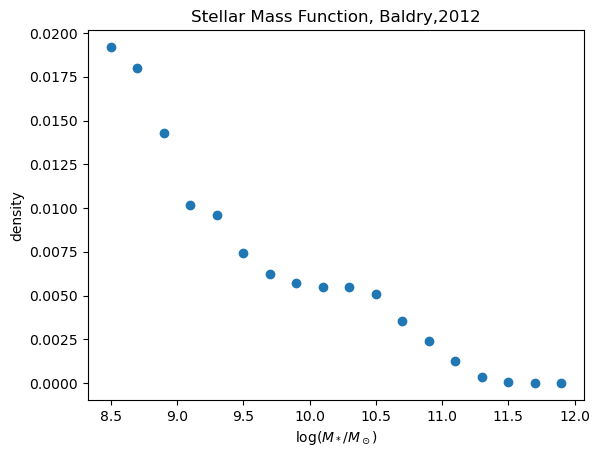

In [96]:

N_points = len(sim)

Mhalo = np.random.choice(Mhalo,N_points)

Mstar_sdss = np.random.choice(stellar_mass_bayes,N_points)
Mstar_sdss = np.log10(Mstar_sdss)

Mstar_3DHST_z1 = np.random.choice(stellar_mass_3DHST[(redshift_3DHST > 1) & (redshift_3DHST < 2)],N_points)
Mstar_3DHST_z2 = np.random.choice(stellar_mass_3DHST[redshift_3DHST>2],N_points)

from astropy.table import Table
tab = Table.read('FITS/SMF_Baldry2012.txt', format='ascii.commented_header')
Mstar_baldry = tab['Mass']
Ndens_baldry = tab['Density']

plt.scatter(Mstar_baldry,Ndens_baldry)
plt.title("Stellar Mass Function, Baldry,2012")
plt.xlabel("log($M_*/M_\odot$)")
plt.ylabel("density")

# From the stellar mass function generate the same number of galaxies as of dark matter halos

from scipy.stats import rv_histogram

# Compute bin edges from midpoints
bin_width = np.diff(Mstar_baldry).mean()  # Assumes uniform bin width
bin_edges = np.concatenate((
    [Mstar_baldry[0] - bin_width / 2],
    Mstar_baldry + bin_width / 2
))

# Normalize the histogram density
pdf_values = Ndens_baldry / np.sum(Ndens_baldry * bin_width)  # Normalize the PDF

# Define histogram for rv_histogram
histogram = (pdf_values, bin_edges)
dist = rv_histogram(histogram)
Mstar_baldry_samples = dist.rvs(size=N_points)  

plt.show()


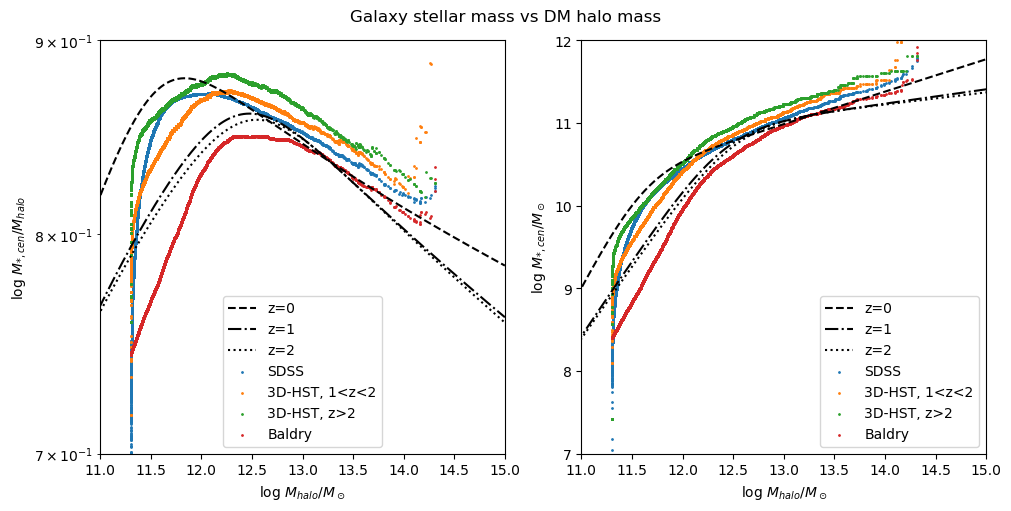

In [97]:

Mstar_sdss = np.sort(Mstar_sdss)
Mstar_3DHST_z1 = np.sort(Mstar_3DHST_z1)
Mstar_3DHST_z2 = np.sort(Mstar_3DHST_z2)
Mstar_baldry_samples = np.sort(Mstar_baldry_samples)

Mhalo = np.sort(Mhalo)

z = np.array([0,2,3])
M1_z = 10**(11.590+1.195*z/(z+1))
N_z = 0.0351-0.0247*z/(z+1)
beta_z = 1.376-0.826*z/(z+1) 
gamma_z = 0.608+0.329*z/(z+1)

M_halo_arr = np.linspace(8,15,500) 
M_star_theorical = []
for i in range(3):
    M_star_theorical.append(np.log10(10**M_halo_arr *2*N_z[i]*((10**M_halo_arr/M1_z[i])**-beta_z[i]+(10**M_halo_arr/M1_z[i])**gamma_z[i])**-1))

fig, ax = plt.subplots(1, 2, figsize=(10,5),layout="constrained") 
fig.suptitle("Galaxy stellar mass vs DM halo mass") 

ax[0].plot(M_halo,M_star_theorical[0]/M_halo_arr,c='black',linestyle='--',label='z=0')
ax[0].plot(M_halo,M_star_theorical[1]/M_halo_arr,c='black',linestyle='-.',label='z=1')
ax[0].plot(M_halo,M_star_theorical[2]/M_halo_arr,c='black',linestyle=':',label='z=2')

ax[0].scatter(Mhalo,Mstar_sdss/Mhalo,s=1,label='SDSS')
ax[0].scatter(Mhalo,Mstar_3DHST_z1/Mhalo,s=1,label='3D-HST, 1<z<2')
ax[0].scatter(Mhalo,Mstar_3DHST_z2/Mhalo,s=1,label='3D-HST, z>2')
ax[0].scatter(Mhalo,Mstar_baldry_samples/Mhalo,s=1,label='Baldry')
ax[0].set_xlim(11,15)
ax[0].set_yscale("log")
ax[0].set_ylim(7e-1,9e-1)
ax[0].legend()
ax[0].set_xlabel("log $M_{halo}/M_\odot$") 
ax[0].set_ylabel("log $M_{*,cen}/M_{halo}$") 


ax[1].plot(M_halo,M_star_theorical[0],c='black',linestyle='--',label='z=0')
ax[1].plot(M_halo,M_star_theorical[1],c='black',linestyle='-.',label='z=1')
ax[1].plot(M_halo,M_star_theorical[2],c='black',linestyle=':',label='z=2')

ax[1].scatter(Mhalo,Mstar_sdss,s=1,label='SDSS')
ax[1].scatter(Mhalo,Mstar_3DHST_z1,s=1,label='3D-HST, 1<z<2')
ax[1].scatter(Mhalo,Mstar_3DHST_z2,s=1,label='3D-HST, z>2')
ax[1].scatter(Mhalo,Mstar_baldry_samples,s=1,label='Baldry, z = 0')
ax[1].set_xlim(11,15)
ax[1].set_ylim(7,12)
ax[1].legend()
ax[1].set_xlabel("log $M_{halo}/M_\odot$") 
ax[1].set_ylabel("log $M_{*,cen}/M_\odot$") 

plt.show()



# Evolution

What is the evolution of the gas mass $m_\text{gas}(t)$? The gas decreases due to star formation ($SFR(t)$), and increases due to inflows ($\dot{m}_\text{gas}^{in}$) and decreases due to outflows ($\dot{m}_\text{gas}^{out}$). $R$ is a factor that accounts for re-incorporation of gas that was previously ejected:

$$ \frac{dm_{gas}}{dt}(t) = -SFR(t) + R \cdot SFR(t) + \dot{m}_{gas}^{in}(t) - \dot{m}_{gas}^{out}(t) $$ 

The metal mass in gas phase (ISM), $m_Z(t)$, is increased by stellar nucleosynthesis ($y \cdot SFR(t)$) and consumed by star formation ($Z \cdot SFR(t)$). It is also driven by inflows or outflows of metals:

$$ \frac{dm_{Z}}{dt}(t) = y \cdot SFR(t) - Z \cdot SFR(t) + \dot{m}_{Z}^{in}(t) - \dot{m}_{Z}^{out}(t) $$ 


**Closed box model**

Assumes no inflows or outflows ($\dot{m}_\text{gas}^{in} = \dot{m}_\text{gas}^{out} = 0$) and $R = 0$ for simplicity. The gas mass decreases only due to star formation. The gas mass evolves exponentially over time, starting from an initial gas mass $m_\text{gas}(t_0)$ at time $t_0$. 

$$ m_{gas}(t) = m_{gas}(t_0) e^{-\epsilon'(t - t_0)} $$ 

The star formation rate also follows an exponential decay, depending on the amount of gas available:

$$ SFR(t) = \epsilon' m_{gas}(t_0) e^{-\epsilon'(t - t_0)} $$ 

The stellar mass $m_*(t)$ at time t is the cumulative star formation over time, given that gas is consumed by star formation:

$$ m_*(t) = m_{gas}(t_0) [1 - e^{-\epsilon'(t - t_0)}] $$ 

And metallcity:

$$ \frac{dm_z}{dt}(t) = y \cdot SFR(t) - Z \cdot SFR(t) = y \cdot SFR(t) - \frac{m_Z(t)}{m_{\text{gas}}(t)} SFR(t) = y \cdot SFR(t) - \epsilon' m_Z(t) $$ 

It's a Cauchy non-homogeneous differential equation which has solution:

$$ m_Z(t) = \left[\int e^{\epsilon'(t - t_0)} y \, SFR(t) dt \right] e^{-\epsilon'(t - t_0)} = y \epsilon' m_{\text{gas}}(t_0) (t - t_0) e^{-\epsilon'(t - t_0)}$$ 

The final expression for the metal mass $m_Z(t)$ as a function of time shows the accumulation of metals over time, which grows linearly with time while decaying exponentially with the gas mass. The metallicity $Z$ is proportional to time, indicating how the galaxy's metal content evolves as star formation proceeds and gas is consumed: $ Z = y \epsilon' (t - t_0) $.


 


**OPEN-BOX MODEL**

$$\frac{dm_{gas}}{dt}(t)=\dot{m}_{gas}^{in}(t,,)-\dot{m}_{gas}^{out}(t,,) -(1-R)\epsilon' m_{gas}(t) $$

-SNIa $\dot{m}^{out}(t,,)\propto\beta\int SFR(t) \propto \beta m_*$

-SNIIa $\dot{m}^{out}(t,,)\propto\eta SFR(t) $

-AGN $\dot{m}^{out}(t,,)\propto\gamma M_{BH} $

-RAM pressure $\dot{m}^{out}(t,,)\propto\rho_{env}v_{gal}^2$

Assumptions: the only important term is the one due to SN type II: 

$$\frac{dm_{gas}}{dt}(t)=\dot{m}_{gas}^{in}(t,,)-(1+\eta-R)\epsilon' m_{gas}(t)$$

$\eta$ is the mass loading factor and encapsulates the efficiency of feedback processes from supernovae SNII in driving outflows from galaxies: $\eta\sim 5-10$ in dwarf galaxies (shallow gravitational potential), $\sim0.1-1$ in Milky Way-like galaxies, $\sim 0.01-0.1$ in massive ellipticals and $\sim 1-5$ in starburst galaxies

If $\dot{m}_{gas}^{in}\ll (1+\eta-R)\epsilon' m_{gas}$: (A) we get the closed box solution. Gas mass drops exponentially and eventually (A) doesn't hold any more  

If $\dot{m}_{gas}^{in}\gg (1+\eta-R)\epsilon' m_{gas}$ (B) the gas mass will increase exponentially up to the point (B) doesn't hold any more  

Will reach equilibrium: $\frac{dm_{gas}}{dt}(t)=0$:     $m_{gas}^{eq}=\frac{\dot{m}_{in}}{{(1+\eta-R)}}$

$$sSFR^{eq}=\frac{\dot{m}_{in}}{m_*}\frac{1}{(1+\eta-R)}$$

$$SFR^{eq}=\dot{m}_{in}\frac{1}{(1+\eta-R)}$$

**Lilly et al**

Doesn't assume equilibrium condition $\frac{dM_{gas}}{dt}=0$. 

$rsSFR=(1-R)sSFR$. Instantaneus return, $R=0.4$.

$$rsSFR(M_*,t)=0.07\left(\frac{M_*}{10^{10.5}M_\odot} \right)^{-0.1}(1+z)^3 \text{Gyr}^{-1} \text{( z<2)}$$

$$=0.3\left(\frac{M_*}{10^{10.5}M_\odot} \right)^{-0.1}(1+z)^{5/3} \text{Gyr}^{-1} \text{(z>2)}$$

$$sMIR(DM)=0.027\left(\frac{M_{halo}}{10^{12}M_\odot} \right)^{0.15}(1+z+0.1(1+z)^{-1.25})^{2.5}$$

SFR is determined by the istantaneous mass of gas in the internal reservoir. 

$$SFR=\epsilon(M_*,t) M_{gas}$$

Defining $\mu = M_{gas}/M_*$, $\mu = \epsilon^{-1}sSFR$. The mass in the gas reservoir changes with time, and the star formation rate is regulated by the gas reservoir. For a more general Kennicut-Schmidt relation $SFR=\epsilon M_{gas}^\kappa$:

$$\mu = (\epsilon^{-1}\cdot sSFR)^{1/\kappa}\cdot M_*^{-(\kappa-1)/\kappa)}$$

$\Psi=\lambda \times SFR$ mass loss from the system (winds). 

$\Phi$ is the istantaneous mass inflow from the halo into the galaxy, and it's a fraction $f_{gal}$ of the baryonic mass inflow into the halo. Mass conservation: 

$$\Phi=(1-R+\lambda)SFR+\dot{M}_{gas}$$

$$\frac{d\mu}{dt}=-\frac{M_{gas}}{M_*^2}(1-R)SFR+\frac{1}{M_*}\frac{dM_{gas}}{dt}$$

$$\frac{dM_{gas}}{dt}=\left(\mu(1-R) + \epsilon^{-1} \frac{dln\mu}{dt}\right)SFR$$

$$\Phi=\left((1-R)(1+\mu) + \lambda + \epsilon^{-1} \frac{dln\mu}{dt}\right)SFR$$

**Davé, Finlator, Oppenheimer**

The equilibrium condition is:
$$\dot{M}_{in}=\dot{M}_{grav}-\dot{M}_{prev}+\dot{M}_{recyc}$$

We define the mass loading factor as $\eta=\dot{M}_{in}/\dot{M}_*$:
$$SFR = \dot{M}_{in}/(1+\eta)$$ 

We assume the cosmology by Dekel et al. (2009)
$$\frac{\dot{M}_{grav}}{M_{halo}}=0.47\,f_b\,M_{halo,12}^{0.15}\left(\frac{1+z}{3}\right)^{2.25} \text{Gyr}^{-1}$$

or, with different parametrization:
$$\dot{M}_{grav}=25.3M_{halo}^{0.1}(1+65z)\sqrt{\Omega_m(1+z)^3+\Omega_\Lambda} \, M_\odot\text{yr}^{-1}$$

The most important term in the preventive feedback parameter $\zeta$: Regulates the amount of gas that accretes to the central forming galaxy after beeing accreted into the halo. It accounts for all complicated physics of SN and AGN feedbacks. The term $\dot{M}_{recyc}$ is the gas infalling back after beeing previously ejected in outflows.

$$\dot{M}_{in}=\zeta\dot{M}_{grav}+\dot{M}_{recyc}$$

The preventive feedback parameter can be scomposed in different terms:

$\zeta_{photo}$: suppression of inflow owing to photoionization heating. Operates at low masses and approaches zero below a photosuppression mass $M_\gamma\approx 10^8 - 10^9 M_\odot$

$\zeta_{quench}$: suppresses effective accretion in massive haloes. Feedback from supermassive black holes. Drops to zero above the quenching mass $M_q\approx 10^{12} M_\odot$.

$\zeta_{grav}$ suppression of inflow by ambient gas heating due to virial shocks (neglecting metal line cooling):

$$\zeta_{grav}\approx0.47\left(\frac{1+z}{4}\right)^{0.38}M_{halo,12}^{-0.25}$$

$\zeta_{winds}$ associated with additional heating of surrounding gas provided by energetic inputs from winds. It's a preventive feedback parameter, while $\eta$ ejective feedback: 

$$SFR= \frac{\zeta\dot{M}_{grav}}{(1+\eta)(1-\alpha_Z)}$$





**Metallicity of the gas reservoir that sustains the regulator**

$Z_0$ metallicity of the infalling gas. $m_Z$, $Z$ mass and fraction of metals in the gas reservoir. $y$ mass of metals returned to the interstellar medium per unit mass that is locked up in long-lived stars $(1-R)M_*$. 

$$\frac{dM_Z}{dt}=y(1-R)SFR-Z(1-R+\lambda)SFR+\Phi Z_0$$

eliminating $\Phi$:

$$\frac{dM_Z}{dt}=(y(1-R)-(Z-Z_0)(1-R+\lambda))SFR+Z_0\frac{dM_{gas}}{dt}$$

$M_Z = ZM_{gas}$, then: 

$$\frac{Z}{dt}=\frac{1}{M_{gas}}\left[(y(1-R)-(Z-Z_0)(1-R+\lambda))SFR-(Z-Z_0)\frac{dM_{gas}}{dt}\right]$$  

or:

$$\frac{dZ}{dt}=(y(1-R)-(Z-Z_0)(1-R+\lambda))\epsilon-(Z-Z_0)\frac{1}{M_{gas}}\frac{dM_{gas}}{dt}$$ 

The three terms in the denominator on the right-hand side of equations reflect the three “destinations” of metals as the incoming flow divides; i.e., long-lived stars, removal from the system in an outflow, and the buildup of the gas reservoir.

An attractive aspect of the regulator is thus that the metallicity
at any point in time is set by the current state of the system
and not by the past history of it, provided that the dln μ/dt
term is small (see also Koppen & Edmunds 1999). In other
words, the chemical “evolution” of the reservoir is more the
changing (and reversible) operation of the regulator than a
monotonically-increasing temporal development of metallicity
due to the buildup of metals. We will henceforth drop the
equilibrium suffix on Zeq.

Metallicities in star-forming galaxies at earlier epochs
will be lower because the sSFRs in stellar systems are generally
higher.




**Dekel & Birnboim**
Once the halo gas is shock heated in massive haloes, what is the
process that keeps it hot and maintains the shutdown required by
the bimodality? 

supernova feedback: weakly dependent on gas fraction, density or metallicity, therefore insensitive to redshift

UV on dust feedback 

Photoionization feedback

AGN feedback



Galaxies will tend to lie around these
relations owing to a balance of inflow, outflow and star formation.
The equilibrium relations depend on three parameters: η, ζ and
α Z , representing ejective feedback (i.e. outflows), preventive feed-
back and wind recycling. Additionally, the star formation law gov-
erns tdep , ˙Mgrav is set by cosmology, and y is set by nucleosynthetic
processes. Assuming those are well established, the mass and red-
shift (and possibly environmental) dependence of η, ζ and αZ gov-
ern the evolution of the global SFR, fgas and ZISM of galaxies. Note
that since the mass and redshift dependence of these parameters
are not fully known, the actual number of free parameters can be
significantly larger than three.

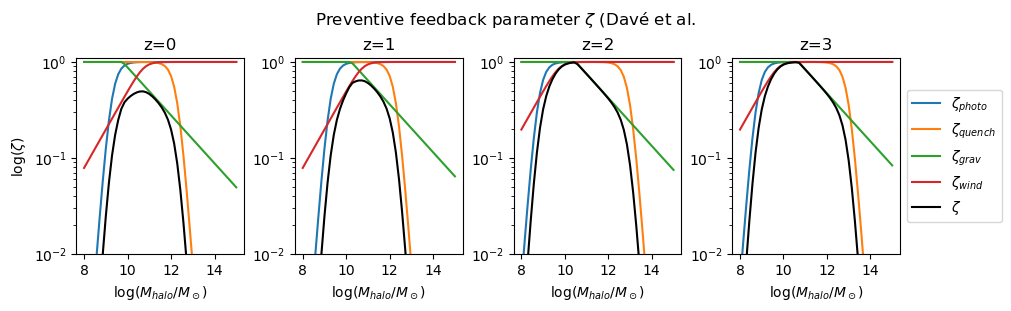

In [77]:
# Galaxy evolution model

def evolve_galaxy(t, z, t_form, 
                  f_b = 0.15,     # baryonic fraction
                  M_h_in = 5.e8, # dark matter halo mass at t_form
                  eps = 0.02,    # star formation efficiency
                  eta = 1,       # mass loading factor
                  R = 0.4,       # gas fraction recycled by stellar winds
                  Z0 = 0,        # initial metallicity
                  y = 0.016,     # metal yield
                  simple = False, # feedback parameter depends only on halo mass and can be 0 or 1 indipendent of z
                  Dekel_Birnboim = False): # Dekel and Birnboim model
    """ 
    Galaxy evolution according to Dave et al. model
    t expressed in Gyr
    z related to t by the Benchmark model
    """
    
    # initialize arrays
    M_h, M_g, M_s, SFR, sSFR, Z = [t * 0 for _ in range(6)]
    dt = np.diff(t)[0] * 1e9 # yr
    
    for i in range(len(t)):
        if t[i] < t_form : 
            M_h[i] = M_h_in
        else:

            # The halo mass grows with cosmology
            
            #M_dot_h = 42.0*((M_h[i-1]/1.e12)**1.127)*(1+1.17*z[i])*(0.3*(1+z[i])**3+0.7)**0.5 #M_sun/yr
            M_dot_h = 510 * ((M_h[i-1]/1.e12)**1.1) * ((1+z[i])/3.12)**2.2 # M_sun/yr
            M_h[i] = M_h[i-1] + M_dot_h * dt 

            # dynamical time ???
            t_dyn = 2.e7*((1+z[i])/3.2)**(-3/2)

            # PREVENTIVE FEEDBACK
            
            zeta = zeta_Dave(M_h[i],z[i])
            
            # Sympler model
            if simple:
                if M_h[i] < 1e8 or M_h[i] > 5e11: 
                    zeta = 0.0
                else: 
                    zeta = 1

            if Dekel_Birnboim:
                if z[i] < 2: 
                    if M_h[i] < 1e8 or M_h[i] > 5e11: 
                        zeta = 0.0
                    else: 
                        zeta = 1
                else: zeta = 1
            
            # Gas mass is accreted by inflows (REGULATED BY zeta PARAMATER)
            # Gas mass is consumed by star formation with Kennicut-Schmidt relation
            # eta is the fraction of mass that remains locked in compact remnants after each supernova
            # R is the recycled fraction from stellar winds
            M_dot_g = f_b * zeta * M_dot_h - (eps/t_dyn) * (1 + eta - R) * M_g[i-1] # M_sun/yr
            
            M_g[i] = M_g[i-1] + M_dot_g * dt

            # SFR follows Kennicut-Schmidt
            SFR[i] = eps * M_g[i]/t_dyn

            # Stellar mass grows with a rate dictated by SFR
            M_s[i] = M_s[i-1] + SFR[i] * dt
            sSFR[i] = SFR[i] / M_s[i]

            # Metallicity
            Z_dot = (y*(1-R)-(Z[i-1]-Z0)*(1-R+eta))*(eps/t_dyn) - (Z[i-1]-Z0) * M_dot_g/M_g[i-1] if M_g[i-1] > 0 else 0
            Z[i] = Z[i-1] + Z_dot * dt
    
    return M_h, M_g, M_s, SFR, sSFR, np.log10(Z/0.02) + 8.69


def zeta_photo(M_halo,z):
    M_gamma = np.where(z<2,3.e9,1.e9) 
    return (1+(1/3)*(M_halo/M_gamma)**-2)**-1.5
    
def zeta_quench(M_halo,z):
    M_quench = np.where(z<2, 10**12.3,1.e13)
    return (1+(M_halo/M_quench)**2)**-1.5 #??

def zeta_grav(M_halo,z):
    x = 0.47*((1+z)/4)**0.38 * (M_halo/10**12)**-0.25
    return np.where(x<1, x, 1)

def zeta_wind(M_halo,z): 
    M_winds = np.where(z<2,1.e11,1.e10) #1.e11 #if z<2 else 1.e1
    return (1+(1/3)*(M_halo/M_winds)**-2)**-0.2

def zeta_Dave(M_halo,z):
    return zeta_photo(M_halo,z)*zeta_quench(M_halo,z)*zeta_grav(M_halo,z)*zeta_wind(M_halo,z)

fig, axes = plt.subplots(1, 4, figsize=(10,3),layout="constrained") 
fig.suptitle('Preventive feedback parameter $\zeta$ (Davé et al.') #fontsize=12

M_halo = np.linspace(8,15)
z_dave = [0,1,2,3]

for i in range(4):
    axes[i].plot(M_halo,zeta_photo(10**M_halo,z_dave[i]),label="$\zeta_{photo}$")
    axes[i].plot(M_halo,zeta_quench(10**M_halo,z_dave[i]),label="$\zeta_{quench}$")
    axes[i].plot(M_halo,zeta_grav(10**M_halo,z_dave[i]),label="$\zeta_{grav}$")
    axes[i].plot(M_halo,zeta_wind(10**M_halo,z_dave[i]),label="$\zeta_{wind}$")
    axes[i].plot(M_halo,zeta_Dave(10**M_halo,z_dave[i]),label="$\zeta$",c='black')
    
axes[0].set_ylabel("log($\zeta$)")
for i in range(4):
    axes[i].set_yscale('log') ; axes[i].set_yscale('log')
    axes[i].set_ylim(10**-2,1.1)
    axes[i].set_xlabel("log($M_{halo}/M_\odot$)") 
    axes[i].set_title("z=%i" %z_dave[i]) 
    
axes[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [12]:
# set global arrays

t = np.linspace(0.01,13,2000) # time (Gyr)

from astropy.cosmology import z_at_value
from astropy.cosmology import Planck13
import astropy.units as u

z = [z_at_value(Planck13.age, age) for age in t * u.Gyr] 
z = np.array(z, dtype=float)

redshift_ticks = [0,1,2,3,4,5]
age_ticks = []
for z_tick in redshift_ticks:
    age_ticks.append(Planck13.age(z_tick).value)


In [89]:
# Evolve the galaxy

t_form_arr = [0.10,0.15,0.19,0.34,0.52,1.00] # Gyrs

curves = []

for t_form in t_form_arr:
    M_h, M_g, M_s, SFR, sSFR, Z = evolve_galaxy(t,z,t_form)
    curves.append([M_h, M_g, M_s, SFR, sSFR, Z])
    

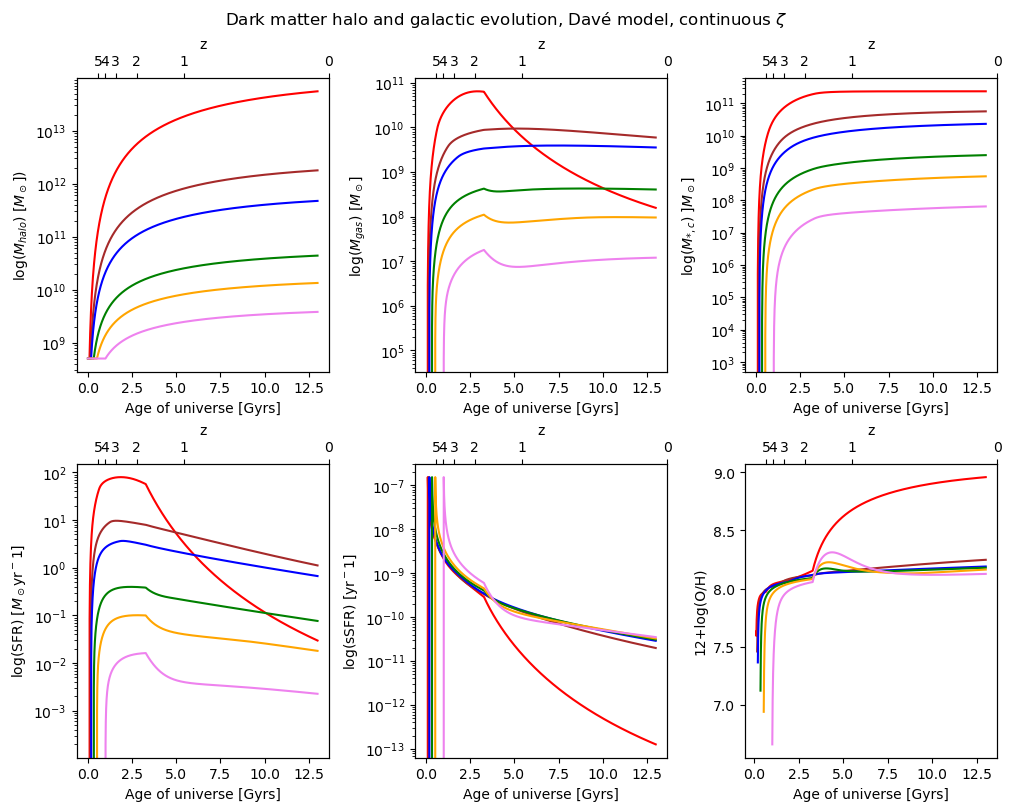

In [90]:

fig, ax = plt.subplots(2,3, figsize=(10,8),layout="constrained") 
fig.suptitle('Dark matter halo and galactic evolution, Davé model, continuous $\zeta$') #fontsize=12
ax = ax.flatten()

color = ["red","brown","blue","green","orange","violet"]

for i,curve in enumerate(curves):
    for j in range(6):
        ax[j].plot(t,curve[j],c=color[i])
        

for j in range(5):
    ax[j].set_yscale("log")

for j in range(6):
    ax[j].set_xlabel("Age of universe [Gyrs]")
    ax[j].twiny().set(xticks=age_ticks,xticklabels=['{:g}'.format(z_tick) for z_tick in redshift_ticks],xlabel="z")


ax[0].set_ylabel("log($M_{halo}$) [$M_\odot$])")
ax[1].set_ylabel("log($M_{gas}$) [$M_\odot$]")
ax[2].set_ylabel("log($M_{*,c}$) ]$M_\odot$]")
ax[3].set_ylabel("log(SFR) [$M_\odot$yr$^-1$]")
ax[4].set_ylabel("log(sSFR) [yr$^-1$]")
ax[5].set_ylabel("12+log(O/H)")


plt.show()

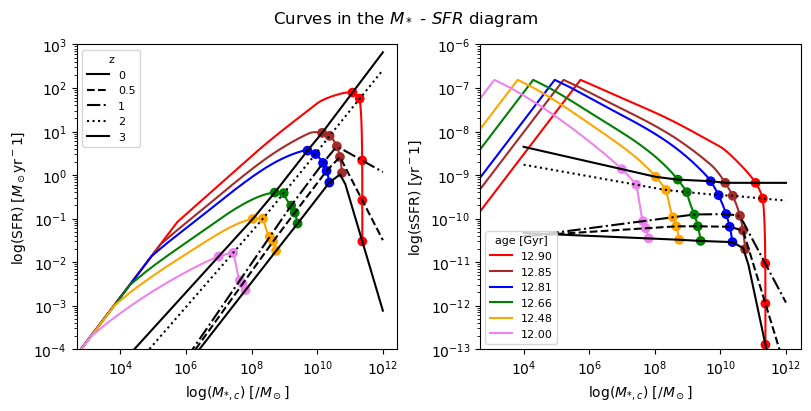

In [97]:
fig, ax = plt.subplots(1,2, figsize=(8,4),layout="constrained") 
fig.suptitle('Curves in the $M_*$ - $SFR$ diagram')

curve_handles = []
z_handles = []

for i,curve in enumerate(curves):
    line1, = ax[0].plot(curve[2],curve[3], c = color[i], label=f"{(t[-1] - t_form_arr[i]):.2f}")
    ax[1].plot(curve[2],curve[4], c = color[i], label=f"{(t[-1] - t_form_arr[i]):.2f}")
    curve_handles.append(line1)

for i in range(2):
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")
    ax[i].set_xlabel("log($M_{*,c}$) [$/M_\odot$]")

ax[0].set_ylim(1e-4,1e3)
ax[1].set_ylim(1e-13,1e-6)

ax[0].set_ylabel("log(SFR) [$M_\odot$yr$^-1$]")
ax[1].set_ylabel("log(sSFR) [yr$^-1$]")

# lines of constant z 
redshift_bins = [0,0.5,1,2,3]
funcs_SFR = []
funcs_sSFR = []
linestyles = ['-','--','-.',':','-']

from scipy.interpolate import interp1d, make_interp_spline

for i, z_val in enumerate(redshift_bins):

    k = np.digitize(z_val,z) - 1
    
    M_s_z = [curve[2][k] for curve in curves]
    SFR_z = [curve[3][k] for curve in curves]
    sSFR_z = [curve[4][k] for curve in curves]

    # Interpolate in log space (log10)    
    SFR_M_fun_z = interp1d(np.log10(M_s_z),np.log10(SFR_z),kind='linear', fill_value="extrapolate")
    sSFR_M_fun_z = interp1d(np.log10(M_s_z),np.log10(sSFR_z),kind='linear', fill_value="extrapolate")
    funcs_SFR.append(SFR_M_fun_z)
    funcs_sSFR.append(sSFR_M_fun_z)

    ax[0].scatter(M_s_z,SFR_z,c=color)
    ax[1].scatter(M_s_z,sSFR_z,c=color)

    m_arr = np.logspace(4,12)
    line1, = ax[0].plot(m_arr,10**SFR_M_fun_z(np.log10(m_arr)),c='black',linestyle=linestyles[i],label=z_val)
    ax[1].plot(m_arr,10**sSFR_M_fun_z(np.log10(m_arr)),c='black',linestyle=linestyles[i],label=z_val)
    z_handles.append(line1)


ax[1].legend(handles = curve_handles, loc="lower left", title="age [Gyr]", fontsize=8,title_fontsize=8)
ax[0].legend(handles = z_handles, loc="upper left", title="z",fontsize=8,title_fontsize=8)


plt.show()



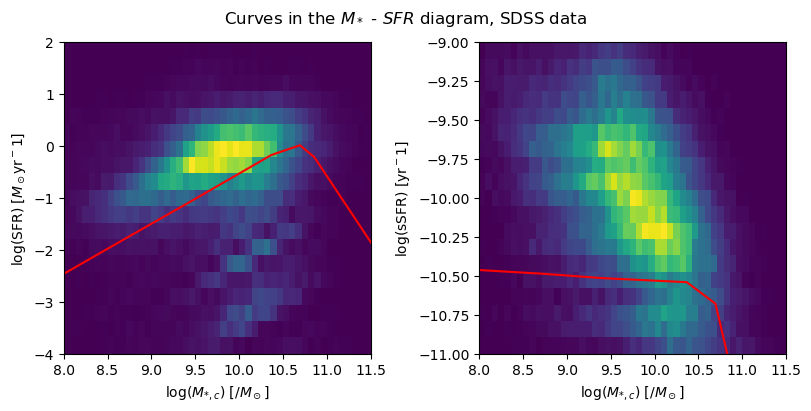

In [98]:
### SDSS z = 0

fig, ax = plt.subplots(1,2, figsize=(8,4),layout="constrained") 
fig.suptitle('Curves in the $M_*$ - $SFR$ diagram, SDSS data')

ax[0].hist2d(np.log10(stellar_mass_best),np.log10(SFR_best),bins=[np.linspace(8,11.5,50),np.linspace(-4,2,20)])
ax[0].plot(np.log10(m_arr),funcs_SFR[0](np.log10(m_arr)),c='red')

ax[1].hist2d(np.log10(stellar_mass_best),np.log10(sSFR_best),bins=[np.linspace(8,11.5,50),np.linspace(-11,-9,20)])
ax[1].plot(np.log10(m_arr),funcs_sSFR[0](np.log10(m_arr)),c='red')

for i in range(2):
    ax[i].set_xlabel("log($M_{*,c}$) [$/M_\odot$]")

ax[0].set_ylabel("log(SFR) [$M_\odot$yr$^-1$]")
ax[1].set_ylabel("log(sSFR) [yr$^-1$]")

plt.show()

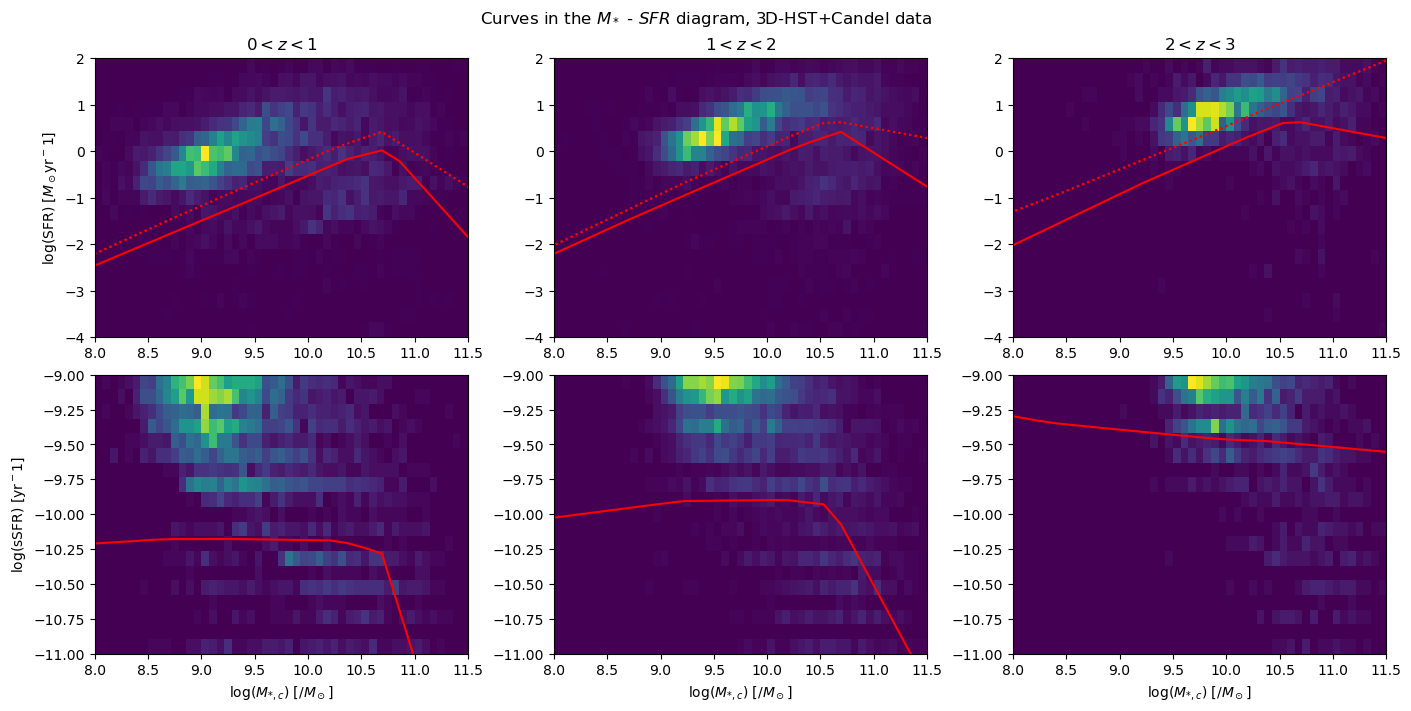

In [105]:
### 3d-HST z > 0
# Dave & Finlator model

z_bins = [0.5,1,2,3]

# devide galaxies in three redshift bins 
redshift_3DHST = CANDELS_3DHST['z_best']
k = np.digitize(redshift_3DHST,z_bins) - 1

stellar_mass_3DHST = CANDELS_3DHST['lmass']
SFR_3DHST = CANDELS_3DHST['lsfr']

fig, ax = plt.subplots(2,3, figsize=(14,7),layout="constrained") 
fig.suptitle('Curves in the $M_*$ - $SFR$ diagram, 3D-HST+Candel data')

for j in range(3):
    ax[0,j].hist2d(stellar_mass_3DHST[k==j],SFR_3DHST[k==j],bins=[np.linspace(8,11.5,50),np.linspace(-4,2,20)])
    ax[0,j].plot(np.log10(m_arr),funcs_SFR[j](np.log10(m_arr)),c='red')
    ax[0,j].plot(np.log10(m_arr),funcs_SFR[j+1](np.log10(m_arr)),c='red',linestyle=':')
    
    ax[1,j].hist2d(stellar_mass_3DHST[k==j],sSFR_3DHST[k==j],bins=[np.linspace(8,11.5,50),np.linspace(-11,-9,20)])
    ax[1,j].plot(np.log10(m_arr),funcs_sSFR[j+1](np.log10(m_arr)),c='red')
    ax[0,j].plot(np.log10(m_arr),funcs_SFR[j+1](np.log10(m_arr)),c='red',linestyle=':')


for i in range(3):
    ax[1,i].set_xlabel("log($M_{*,c}$) [$/M_\odot$]")

ax[0,0].set_title("$0<z<1$")
ax[0,1].set_title("$1<z<2$")
ax[0,2].set_title("$2<z<3$")

ax[0,0].set_ylabel("log(SFR) [$M_\odot$yr$^-1$]")
ax[1,0].set_ylabel("log(sSFR) [yr$^-1$]")

plt.show()

# Test Dekel & Birnboim model

The Dekel & Birnboim (2006) model describes the evolution of galaxy accretion and the transition from cold-mode accretion to hot-mode accretion with redshift (z). It proposes that at high redshifts (z > 2), galaxies primarily accrete gas in a cold mode, where gas flows directly to the galaxy in a thin, fast-moving stream. As the universe ages and the halo mass increases, at lower redshifts (z < 2), accretion shifts to a hot mode, where gas becomes shock-heated as it falls into the gravitational well of the galaxy, forming a hot, extended atmosphere. This model also connects the cold-to-hot mode transition to the halo mass and critical temperature of the accreting gas.
    

<div style="text-align:center;">
    <img src="images/Dekel_Birnboim.png" width="30%" style="display:inline-block" />
</div>



In [101]:
# Evolve the galaxy with simple model

t_form_arr = [0.10,0.15,0.19,0.34,0.52,1.00] # Gyrs

curves_simple = []

for t_form in t_form_arr:
    M_h, M_g, M_s, SFR, sSFR, Z = evolve_galaxy(t,z,t_form,simple=True)
    curves_simple.append([M_h, M_g, M_s, SFR, sSFR, Z])

In [102]:
# Evolve the galaxy with Dekel & Birnboim model

curves_dekel = []

for t_form in t_form_arr:
    M_h, M_g, M_s, SFR, sSFR, Z = evolve_galaxy(t,z,t_form,Dekel_Birnboim=True)
    curves_dekel.append([M_h, M_g, M_s, SFR, sSFR, Z])

In [103]:

# lines of constant z 
redshift_bins = [0,1.5,2.0,3.0]
funcs_SFR_simple = []
funcs_sSFR_simple = []
funcs_SFR_dekel = []
funcs_sSFR_dekel = []

from scipy.interpolate import interp1d, make_interp_spline

for i, z_val in enumerate(redshift_bins):

    k = np.digitize(z_val,z) - 1
    
    M_s_z = [curve[2][k] for curve in curves_simple]
    SFR_z = [curve[3][k] for curve in curves_simple]
    sSFR_z = [curve[4][k] for curve in curves_simple]

    # Interpolate in log space (log10)    
    SFR_M_fun_z = interp1d(np.log10(M_s_z),np.log10(SFR_z),kind='linear', fill_value="extrapolate")
    sSFR_M_fun_z = interp1d(np.log10(M_s_z),np.log10(sSFR_z),kind='linear', fill_value="extrapolate")
    funcs_SFR_simple.append(SFR_M_fun_z)
    funcs_sSFR_simple.append(sSFR_M_fun_z)

    M_s_z = [curve[2][k] for curve in curves_dekel]
    SFR_z = [curve[3][k] for curve in curves_dekel]
    sSFR_z = [curve[4][k] for curve in curves_dekel]

    # Interpolate in log space (log10)    
    SFR_M_fun_z = interp1d(np.log10(M_s_z),np.log10(SFR_z),kind='linear', fill_value="extrapolate")
    sSFR_M_fun_z = interp1d(np.log10(M_s_z),np.log10(sSFR_z),kind='linear', fill_value="extrapolate")
    funcs_SFR_dekel.append(SFR_M_fun_z)
    funcs_sSFR_dekel.append(sSFR_M_fun_z)



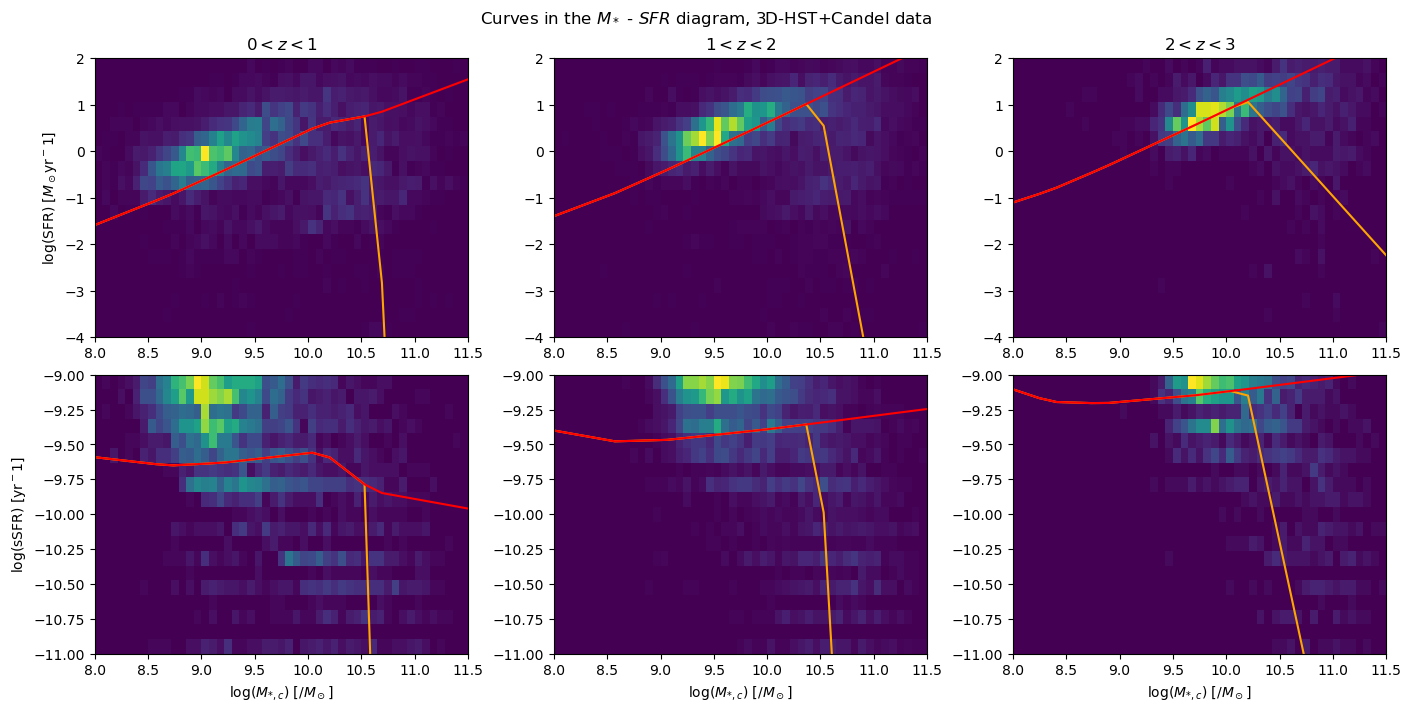

In [106]:
### Test simple model vs Dekel and Birnboim model

z_bins = [0.5,1,2,3]

# devide galaxies in three redshift bins 
redshift_3DHST = CANDELS_3DHST['z_best']
k = np.digitize(redshift_3DHST,z_bins) - 1

stellar_mass_3DHST = CANDELS_3DHST['lmass']
SFR_3DHST = CANDELS_3DHST['lsfr']

fig, ax = plt.subplots(2,3, figsize=(14,7),layout="constrained") 
fig.suptitle('Curves in the $M_*$ - $SFR$ diagram, 3D-HST+Candel data')

for j in range(3):
    ax[0,j].hist2d(stellar_mass_3DHST[k==j],SFR_3DHST[k==j],bins=[np.linspace(8,11.5,50),np.linspace(-4,2,20)])
    ax[0,j].plot(np.log10(m_arr),funcs_SFR_simple[j+1](np.log10(m_arr)),c='orange')
    ax[0,j].plot(np.log10(m_arr),funcs_SFR_dekel[j+1](np.log10(m_arr)),c='red')
    
    ax[1,j].hist2d(stellar_mass_3DHST[k==j],sSFR_3DHST[k==j],bins=[np.linspace(8,11.5,50),np.linspace(-11,-9,20)])
    ax[1,j].plot(np.log10(m_arr),funcs_sSFR_simple[j+1](np.log10(m_arr)),c='orange')
    ax[1,j].plot(np.log10(m_arr),funcs_sSFR_dekel[j+1](np.log10(m_arr)),c='red')


for i in range(3):
    ax[1,i].set_xlabel("log($M_{*,c}$) [$/M_\odot$]")

ax[0,0].set_title("$0<z<1$")
ax[0,1].set_title("$1<z<2$")
ax[0,2].set_title("$2<z<3$")

ax[0,0].set_ylabel("log(SFR) [$M_\odot$yr$^-1$]")
ax[1,0].set_ylabel("log(sSFR) [yr$^-1$]")

plt.show()